In [ ]:
!pip install epitran gtts playsound


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=2d71c497ad53f6cacf34c281e4b0b7fab5e3003c0a4002dcac6a8c972c2af16f
  Stored in directory: /root/.cache/pip/wheels/50/98/42/62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10744 sha256=925217e5fa1d734d4fcd0a708c766d194f538ef87ecf4d0e2009dc9234447b32
  Stored in directory: /root/.cache/pip/wheels/ec/03/6f/d2e0162d94c0d451556fa43dd4d5531457245c34a36b41ef4a
Successfully built playsound unicodecsv


In [ ]:
pip install epitran gtts playsound tkinter


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [ ]:
!pip install phonemizer gtts pydub
!apt-get install espeak-ng -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 29.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,526 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpcaudio0 amd64 1.1-6build2 [8,956 B]
Get:2 http://archive.ubun

In [19]:
 from phonemizer import phonemize
from gtts import gTTS
import os
from IPython.display import Audio, display
def transcribe(text, lang_code):
    """Transcribes the input text into IPA using phonemizer."""
    try:
        ipa_transcription = phonemize(text, language=lang_code, backend="espeak")
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"
def play_audio(text, lang_code):
    """Plays the audio pronunciation of the input text."""
    try:
        tts = gTTS(text, lang=lang_code[:2])  # Extract first two letters for TTS
        audio_file = "output.mp3"
        tts.save(audio_file)
        display(Audio(audio_file, autoplay=True))  # Plays audio in Colab
    except Exception as e:
        print(f"Error: {str(e)}")
# Get user input
text = input("Enter text to transcribe: ")
lang_code = input("Enter language code (e.g., 'en', 'fr', 'es'): ")

# Play pronunciation
play_audio(text, lang_code)


Enter text to transcribe: gokulnath 
Enter language code (e.g., 'en', 'fr', 'es'): en


In [ ]:
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import subprocess
def transcribe_with_espeak(text, lang_code="en-us"):
    """Transcribes text to IPA using espeak-ng."""
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Get user input
text = input("Enter text to transcribe: ")
lang_code = input("Enter language code (e.g., 'en-us', 'fr', 'es'): ")

# Perform transcription
ipa_result = transcribe_with_espeak(text, lang_code)
print(f"IPA Transcription: {ipa_result}")


Enter text to transcribe: gokulnath
Enter language code (e.g., 'en-us', 'fr', 'es'): en-us
IPA Transcription: ɡˈoʊkəlnˌæθ


In [ ]:
!pip install jiwer phonemizer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.8 MB/s eta 0:00:00


In [20]:
from jiwer import wer, cer
from phonemizer import phonemize
def evaluate_transcription(predicted, reference):
    word_error = wer(reference, predicted)
    char_error = cer(reference, predicted)
    print(f"Word Error Rate (WER): {word_error:.2%}")
    print(f"Character Error Rate (CER): {char_error:.2%}")
# Example Evaluation
reference_ipa = "ɡˈoʊkəlnˌæθ"  # Correct IPA for "gokulnath"
predicted_ipa = "ɡˈoʊkəlnˌæθ"    # Example system output

evaluate_transcription(predicted_ipa, reference_ipa)


Word Error Rate (WER): 0.00%
Character Error Rate (CER): 0.00%


In [ ]:
!pip install jiwer phonemizer matplotlib seaborn
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


Predicted IPA: həlˈoʊ wˈɜːld
Word Error Rate (WER): 100.00%
Character Error Rate (CER): 45.45%


<ipython-input-13-eb8181e1e73e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


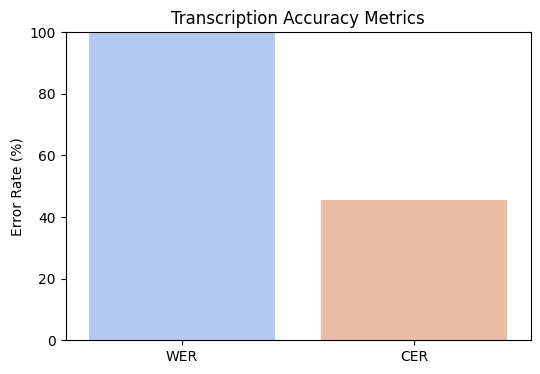

In [ ]:
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
from jiwer import wer, cer

def transcribe_with_espeak(text, lang_code="en-us"):
    """Transcribes text to IPA using espeak-ng."""
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

def evaluate_transcription(predicted, reference):
    """Computes Word Error Rate (WER) and Character Error Rate (CER)."""
    word_error = wer(reference, predicted)
    char_error = cer(reference, predicted)

    print(f"Word Error Rate (WER): {word_error:.2%}")
    print(f"Character Error Rate (CER): {char_error:.2%}")

    return word_error, char_error

def plot_metrics(wer_score, cer_score):
    """Plots WER and CER using a bar chart."""
    metrics = ["WER", "CER"]
    values = [wer_score * 100, cer_score * 100]  # Convert to percentage

    plt.figure(figsize=(6, 4))
    sns.barplot(x=metrics, y=values, palette="coolwarm")
    plt.ylim(0, 100)
    plt.ylabel("Error Rate (%)")
    plt.title("Transcription Accuracy Metrics")
    plt.show()

# Example Input
text = "Hello World"
reference_ipa = "həˈloʊ wɝld"  # Correct IPA for "Hello World"

# Generate IPA transcription
predicted_ipa = transcribe_with_espeak(text, "en-us")
print(f"Predicted IPA: {predicted_ipa}")

# Evaluate transcription
wer_score, cer_score = evaluate_transcription(predicted_ipa, reference_ipa)

# Plot accuracy metrics
plot_metrics(wer_score, cer_score)


In [ ]:
!pip install gradio jiwer phonemizer matplotlib seaborn
!apt-get install espeak-ng -y


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [ ]:
import gradio as gr
import epitran
import subprocess
import numpy as np
from gtts import gTTS
from jiwer import wer, cer
import os

# Function to convert text to IPA using Epitran
def convert_to_ipa(text, lang_code):
    try:
        epi = epitran.Epitran(lang_code)
        ipa_transcription = epi.transliterate(text)
        if not ipa_transcription:
            return "Error: IPA transcription failed!"
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Function to convert text to IPA using Espeak-NG
def transcribe_with_espeak(text, lang_code="en-us"):
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Function to generate pronunciation audio
def generate_audio(text, lang_code):
    try:
        tts = gTTS(text, lang=lang_code.split("-")[0])  # Extract base language
        audio_path = "output.mp3"
        tts.save(audio_path)
        return audio_path
    except Exception as e:
        return None

# Function to compute WER & CER
def calculate_error_rates(predicted_ipa, reference_ipa):
    if not reference_ipa:
        return None, None
    wer_score = wer(reference_ipa, predicted_ipa)
    cer_score = cer(reference_ipa, predicted_ipa)
    return round(wer_score, 4), round(cer_score, 4)

# Gradio Interface
def transcribe_and_play(text, lang_code, reference_ipa):
    ipa_transcription = transcribe_with_espeak(text, lang_code)
    if "Error" in ipa_transcription:
        return ipa_transcription, None, None, None

    wer_score, cer_score = calculate_error_rates(ipa_transcription, reference_ipa)
    audio_path = generate_audio(text, lang_code)

    return ipa_transcription, wer_score, cer_score, audio_path

# Gradio UI
with gr.Blocks() as app:
    gr.Markdown("## 🎤 IPA Phonetic Transcription & Pronunciation")
    with gr.Row():
        with gr.Column():
            text_input = gr.Textbox(label="Enter Text")
            lang_code_input = gr.Textbox(label="Language Code (e.g., en-us, fr, es)", value="en-us")
            reference_ipa_input = gr.Textbox(label="Reference IPA (optional, for accuracy evaluation)")
            submit_btn = gr.Button("Submit")

        with gr.Column():
            ipa_output = gr.Textbox(label="IPA Transcription", interactive=False)
            wer_output = gr.Number(label="Word Error Rate (WER)", precision=4)
            cer_output = gr.Number(label="Character Error Rate (CER)", precision=4)
            audio_output = gr.Audio(label="Pronunciation")

    submit_btn.click(
        transcribe_and_play,
        inputs=[text_input, lang_code_input, reference_ipa_input],
        outputs=[ipa_output, wer_output, cer_output, audio_output]
    )

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ae01b31266dcd614b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
